In [7]:
%load_ext autoreload
%autoreload 2
from gratin.standard import train_model, load_model, plot_demo, get_predictions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
export_path = "/Users/hverdier/models/demo"

In [ ]:
model, encoder = train_model(
    export_path= export_path,
    max_n_epochs=10,
    #export_path="/home/hverdier/models/demo_standard",
    num_workers=4,
    time_delta=.03)

In [4]:
model, encoder = load_model(export_path)

stage is None, strange...
Create TrajDataset, seed_offset = 100000
Create TrajDataset, seed_offset = 0
Create TrajDataset, seed_offset = 200000
Create TrajDataset, seed_offset = 200000


/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
alpha_test_MeanAbsoluteError     0.2930472791194916
      alpha_test_loss           0.42005831003189087
     model_test_F1Score          0.5613982081413269
      model_test_loss            0.623663604259491
         test_loss               0.9606260657310486
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Create TrajDataset, seed_offset = 200000


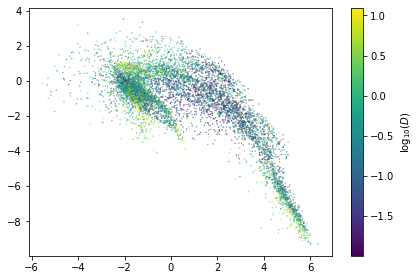

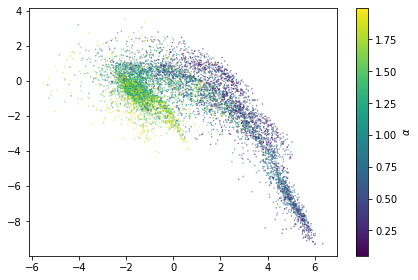

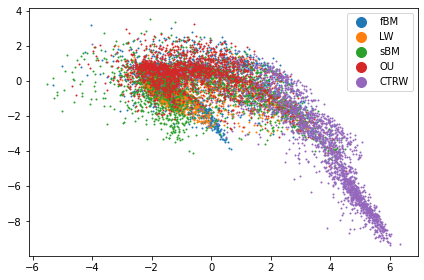

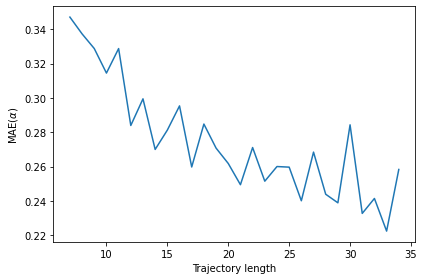

In [15]:
plot_demo(model,encoder,num_workers=4,time_delta=0.03)

In [20]:
import numpy as np
D = 1. #um^2/s
delta_t = 0.03 # s
df = get_predictions(model, encoder, [np.cumsum(np.random.randn(30,2)*np.sqrt(D*delta_t),axis=0) for i in range(1000)])

In [21]:
df.head()

,alpha,best_model,p_fBM,p_LW,p_sBM,p_OU,p_CTRW,U_1,U_2,h_1,...,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16
0,1.385280,sBM,0.203017,0.018435,0.596660,0.164315,0.017572,-4.402395,-0.501720,1.052413,...,0.513428,0.061660,0.068936,-0.447830,0.243729,0.340828,-0.125591,-0.424217,0.251776,0.566417
1,1.173748,OU,0.185406,0.004081,0.306925,0.501529,0.002058,-2.375593,0.393717,0.500231,...,-0.218937,-0.158779,-0.413302,-0.283175,-0.381534,0.104260,-0.465697,-0.483695,0.134130,0.083321
2,1.238848,sBM,0.223693,0.013801,0.436024,0.318883,0.007600,-3.281510,0.343166,0.698404,...,0.107234,-0.103830,-0.091172,-0.362241,-0.097208,0.206940,-0.227624,-0.418556,0.170828,0.225998
3,0.947021,OU,0.221302,0.013497,0.232214,0.526743,0.006243,-1.817933,0.460489,0.293349,...,-0.317974,-0.140862,-0.205443,-0.151231,-0.397388,-0.027914,-0.213888,-0.335359,0.107259,-0.195587
4,0.797144,OU,0.277201,0.013119,0.180816,0.515906,0.012958,-1.357954,1.770708,0.150398,...,-0.509680,-0.003768,0.058066,-0.032465,-0.407177,-0.339671,0.094568,-0.410134,0.117665,0.031314


Text(0.5, 0, 'Inferred $\\alpha$')

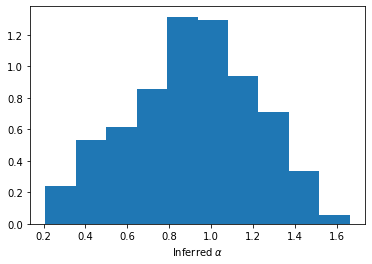

In [24]:
import matplotlib.pyplot as plt
plt.hist(df["alpha"],density=True)
plt.xlabel("Inferred $\\alpha$")